1: Getting and setting up the data.

2: Visualizing current data.

3: The mathematics behind the Least Squares Method.

4: Using Numpy for a Univariate Linear Regression.

5: Getting the error.

6: Using scikit learn to implement a multivariate regression.

7: Using Training and Validation.  

8: Predicting Prices

9: Residual Plots

### 1. Getting and setting up the data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# setting a white grid style for seaborn
sns.set_style('whitegrid')

# to ensure that we can see the plot
%matplotlib inline

In [3]:
# import boston dataset from in-built scikit-learn datasets 
from sklearn.datasets import load_boston

In [4]:
# load boston dataset
boston = load_boston()

In [5]:
# .DESCR is a built-in method to describe the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 2. Visualizing the dataset

Text(0, 0.5, 'Number of houses')

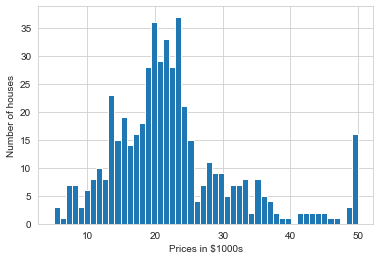

In [6]:
# As mentioned in the data set characteristic, Median value usually is
# the target
plt.hist(boston.target, bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

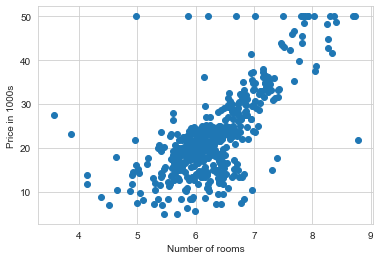

In [7]:
# [:, 5] means, we want every attributes in the fifth column/index. 
# Why fifth? because the average number of room i.e. RM is 6th column
# as mentioned in the data set characteristics. since these attributes
# are represented in order. RM is at 5th index position; starting from 0

# x-axis is the average number of room and y-axis is the price
plt.scatter(boston.data[:, 5], boston.target)
plt.ylabel('Price in 1000s')
plt.xlabel('Number of rooms')

Text(0, 0.5, 'Price in 1000s')

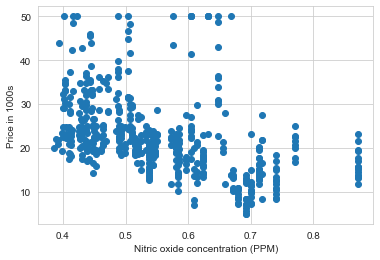

In [8]:
plt.scatter(boston.data[:, 4], boston.target)
plt.xlabel('Nitric oxide concentration (PPM)')
plt.ylabel('Price in 1000s')

In [9]:
boston_df = DataFrame(boston.data)

# .feature_name .data .target are functions that are specific to the
# dataset available with scikit-learn
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# create one extra column for the target of the boston data set i.e price
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


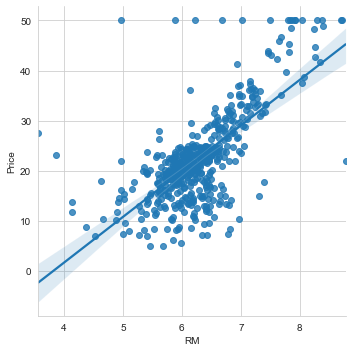

In [12]:
# plotting scatter plot using seaborn lmplot
sns.lmplot('RM', 'Price', data=boston_df)

### 3. Mathematics behind least square method

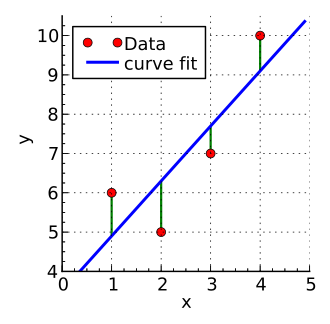

In [13]:
# Quick display of image from wikipedia
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/330px-Linear_least_squares_example2.svg.png'
Image(url)

### 4. Using Numpy for a Univariate Linear Regression
Numpy has a built-in least square method take 2 variable, first one's a 2-dimensional array (where first dimension is different example value and the second dimension is the attribute number.

In the current scenario, we have average number of rooms per house. since this is a single attribute, second dimension of the array x will be 1. so we need (506, 1) shape array (506 is total data points for 'RM'.

In [14]:
x = boston_df['RM']  # you can also use boston_df.RM
print(x)
x.shape

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


(506,)

In [15]:
# Easy way to create a 2d array is vstack

# Set up X a median room values
X = boston_df.RM

# Set up Y as the target price of the house
Y = np.array(boston_df.Price)
Y.shape

(506,)

In [16]:
# Creating a 506 x 2 matrix with X as its first column and 1 as second column
A = np.vstack([X, np.ones(len(X))]).T


In [18]:
# getting the best fit value m, b using builtin least square method of
# linear algebra library. 

# getting the first index of the result
m, b = np.linalg.lstsq(A, Y)[0]

<ipython-input-18-73540740c663>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, b = np.linalg.lstsq(A, Y)[0]


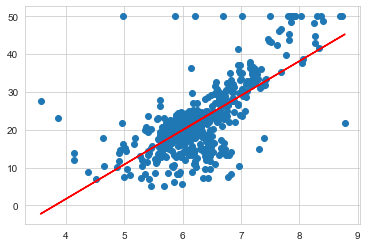

In [21]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM

# This will create the graph which was automatically created by seaborn
# 'r' makes the line red
plt.plot(x, m*x + b, 'r', label="Best fit line")

### 5. Getting the error

Resulting array from lstsq has the total squared eror at index 1. For each element, it checks the difference between the line and the true value, squares it, and then returns the sum of all these.

In [23]:
result = np.linalg.lstsq(A, Y)

error_total = result[1]

# root mean square error or standard deviation 
rmse = np.sqrt(error_total/len(A))

print(f'The root mean square error was: {rmse}')

The root mean square error was: [6.60307139]


<ipython-input-23-0dd944bac04f>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(A, Y)


### 6. Using scikit-learn to implement multivariable regression

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. in scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters.

In [24]:
import sklearn
from sklearn.linear_model import LinearRegression

In [25]:
# creating a lineare regression object
lreg = LinearRegression()

In [26]:
X_multi = boston_df.drop('Price', 1)
Y_target = boston_df.Price

In [27]:
# This will fit a linear model
lreg.fit(X_multi, Y_target)

LinearRegression()

In [29]:
print(f'The estimated intercept coefficient is: {lreg.intercept_}')
print(f'The number of coefficient used was: {len(lreg.coef_)}')


The estimated intercept coefficient is: 36.45948838508982
The number of coefficient used was: 13


We have basically made an equation for a line, but instead of just one coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the documentation for this equation:
                y(w,x)=w0+w1x1+...+wpxp
                Where w=(w1,...wp) as the coefficients and
                w0 as the intercept

In [33]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
print(coeff_df)

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df


   Features
0      CRIM
1        ZN
2     INDUS
3      CHAS
4       NOX
5        RM
6       AGE
7       DIS
8       RAD
9       TAX
10  PTRATIO
11        B
12    LSTAT
13    Price


,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335
